<a href="https://colab.research.google.com/github/plaban1981/ZINDI_HACKATHON/blob/master/The_Zimnat_Insurance_Assurance_Challenge_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
The objective of this hackathon is to develop a predictive model that determines the likelihood for a customer to churn - to seek an alternative insurer or simply stop paying for insurance altogether.

# Files available for download

* client_data.csv - Contains some personal information on the principal member, such as location, branch and agent code, age etc.
* payment_history.csv - Contains payment history up to the end of 2018 tied to 
Policy ID. Payments made in 2019 are not provided.

* policy_data.csv - Describes the policies themselves. There may be multiple rows for each Policy ID since policies can cover more than one person.

* train.csv - contains a list of all the policies. Policies that lapsed in 2017, 2018 or 2019 are identified with a 1 in the ‘Lapse’ column, and the year is provided. The policies with a '?' in the 'Lapse' and 'Lapse Year' column are the policies that remained and had not lapsed as of the end of 2019. You must estimate the likelihood that these policies lapsed or not in 2020.
* sample_submission.csv - is an example of what your submission should look like. The order of the rows does not matter but the name of the ID must be correct.
* variable_defintions.txt - definitions of the variables

# Client_data

Contains some personal information on the principal member, such as location, branch and agent code, age etc. 
* Policy_ID - Policy ID for the main member
* NPH_LASTNAME - last name of principle member
* NPH_SEX - sex of principle member
* NPH_BIRTHDATE - birth year of principle member
* NAD_ADDRESS1 - main address of principle member
* NAD_ADDRESS2 - second address of principle member
# Payment_history

Contains partial payment history up to the end of 2018, tied to Policy ID. 
* Policy_ID - Policy ID for the main member
* AMOUNTPAID - Amount paid
* DATEPAID - date payment made
* POSTDATE - a cool functionality to have for disussions is for Zindi to be able to pin posts to the top of challenge threads.
* PREMIUMDATE - it states the next date on which the premium should be paid by to keep the policy alive

# Policy_data.csv

Describes the policies themselves. There may be multiple rows for each Policy ID since policies can cover more than one person.
* Policy_ID - Policy ID for the main member
* NP2_EFFECTDATE - Date started
* PPR_PRODCD - specifies the product code of product subscribed by the client
* NPR_PREMUIM - Extra premium
* NPH_LASTNAME - last name of member
* CLF_LIFECD - differentiates relationship to principal.   1 principal 2 spouse , 3 child , 4 parent , 5 parent, 6 extended
* NSP_SUBPROPOSAL - unique identifier of a life on a policy on a specific policy we can have the principal as 111  child1 as 222 child2 as 333
* NPR_SUMASSURE - 
* NLO_TYPE - identifies the premium types charged on a policy
* NLO_AMOUNT - amount if there’s an extra charge
* AAG_AGCODE - agent code of the policy agent
* PCL_LOCATCODE - branch code
* OCCUPATION - Job 
* CATEGORY - area of work

# train.csv 

Contains a list of all the policies. Policies that lapsed in 2017, 2018 or 2019 are identified with a 1 in the ‘Lapse’ column, and the year is provided. All other columns have a ‘?’ you need to predict if that customer will lapse in 2020. 
* Policy_ID 
* Lapse
* Lapse Year

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

# train.csv 

Contains a list of all the policies. Policies that lapsed in 2017, 2018 or 2019 are identified with a 1 in the ‘Lapse’ column, and the year is provided. All other columns have a ‘?’ you need to predict if that customer will lapse in 2020. 
* Policy_ID 
* Lapse
* Lapse Year

In [321]:
train = pd.read_csv('/content/drive/My Drive/Zindi/train.csv')
train.head()

,Policy ID,Lapse,Lapse Year
0,PID_4928TWH,?,?
1,PID_KBLLEGK,?,?
2,PID_90F0QA3,?,?
3,PID_18F3NHF,?,?
4,PID_SX4QUVO,?,?


In [150]:
train.shape

(51685, 3)

In [151]:
train['Lapse Year'].value_counts()

?       43707
2019     5007
2018     2561
2017      410
Name: Lapse Year, dtype: int64

In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51685 entries, 0 to 51684
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Policy ID   51685 non-null  object
 1   Lapse       51685 non-null  object
 2   Lapse Year  51685 non-null  object
dtypes: object(3)
memory usage: 1.2+ MB


In [153]:
train['Lapse Year'].value_counts()

?       43707
2019     5007
2018     2561
2017      410
Name: Lapse Year, dtype: int64

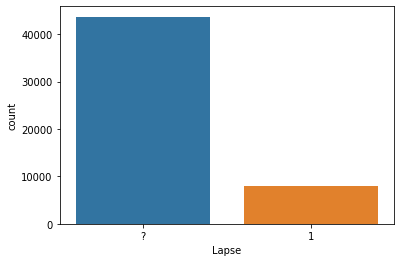

In [9]:
sns.countplot(x='Lapse',data=train)

In [154]:
train.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

# Policy_data.csv

Describes the policies themselves. There may be multiple rows for each Policy ID since policies can cover more than one person.
* Policy_ID - Policy ID for the main member
* NP2_EFFECTDATE - Date started
* PPR_PRODCD - specifies the product code of product subscribed by the client
* NPR_PREMUIM - Extra premium
* NPH_LASTNAME - last name of member
* CLF_LIFECD - differentiates relationship to principal.   1 principal 2 spouse , 3 child , 4 parent , 5 parent, 6 extended
* NSP_SUBPROPOSAL - unique identifier of a life on a policy on a specific policy we can have the principal as 111  child1 as 222 child2 as 333
* NPR_SUMASSURE - 
* NLO_TYPE - identifies the premium types charged on a policy
* NLO_AMOUNT - amount if there’s an extra charge
* AAG_AGCODE - agent code of the policy agent
* PCL_LOCATCODE - branch code
* OCCUPATION - Job 
* CATEGORY - area of work


In [155]:
policy = pd.read_csv('/content/drive/My Drive/Zindi/policy_data.csv')
policy.head()

,Policy ID,NP2_EFFECTDATE,PPR_PRODCD,NPR_PREMIUM,NPH_LASTNAME,CLF_LIFECD,NSP_SUBPROPOSAL,NPR_SUMASSURED,NLO_TYPE,NLO_AMOUNT,AAG_AGCODE,PCL_LOCATCODE,OCCUPATION,CATEGORY
0,PID_EPZDSP8,1/9/2019,PPR_PRODCD_B2KVCE7,265.724174,NPH_LASTNAME_BPN2LEB,2,222,NaN,NLO_TYPE_DPBHSAH,NaN,AAG_AGCODE_APWOOPE,PCL_LOCATCODE_7SHK7I9,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB
1,PID_6M6G9IB,1/8/2018,PPR_PRODCD_64QNIHM,2795.069380,NPH_LASTNAME_U2H3GC6,1,111,213380.713197,NLO_TYPE_XTHV3A3,609.054794,AAG_AGCODE_9Z3FBGA,PCL_LOCATCODE_7VFS3EQ,OCCUPATION_IKCIDKW,CATEGORY_R821UZV
2,PID_UL0F7LH,1/8/2017,PPR_PRODCD_KOFUYNN,2492.759107,NPH_LASTNAME_B68RERV,1,111,238857.872515,NLO_TYPE_XAJI0Y6,1339.461987,AAG_AGCODE_Y0LKFF0,PCL_LOCATCODE_SKPRCR4,OCCUPATION_NUJZA7T,CATEGORY_8DALFYO
3,PID_TRGUBTU,1/4/2018,PPR_PRODCD_KOFUYNN,3982.538095,NPH_LASTNAME_NPN3VGI,1,111,74968.903115,NLO_TYPE_XAJI0Y6,7870.961557,AAG_AGCODE_1OCF2N0,PCL_LOCATCODE_SPQHMX5,OCCUPATION_W9XA3KX,CATEGORY_LXSLG6M
4,PID_TODLPIB,1/12/2019,PPR_PRODCD_KOFUYNN,1143.953733,NPH_LASTNAME_9VSNH0E,3,555,238857.872515,NLO_TYPE_DPBHSAH,NaN,AAG_AGCODE_E31VV8B,PCL_LOCATCODE_0T6GYGX,OCCUPATION_NNHJ7XV,CATEGORY_GWW4FYB


In [156]:
policy.isnull().sum()[policy.isnull().sum() > 0]

NPR_PREMIUM           54
NPR_SUMASSURED     94322
NLO_AMOUNT        193192
dtype: int64

# Imputing Missing Values

In [0]:
policy['NPR_PREMIUM'].fillna(0,inplace=True)
policy['NLO_AMOUNT'].fillna(0,inplace=True)
policy['NPR_SUMASSURED'].fillna(policy['NPR_SUMASSURED'].median(),inplace=True)

In [158]:
policy['Policy ID'].nunique()

51685

the number of policy id in policy table matches with that of train table

# Considering only primary policy holders

In [0]:
policy = policy[policy['CLF_LIFECD'] == 1]

# Genearate new features from POLICY data

In [0]:
policy_data = policy.copy()

In [0]:

prd_count_mapper = policy_data.groupby('Policy ID')['PPR_PRODCD'].count().to_dict()

policy_data['NP2_EFFECTDATE'] = pd.to_datetime(policy_data['NP2_EFFECTDATE'])

policy_data['start_year'] = policy_data['NP2_EFFECTDATE'].dt.year

policy_data['policy_age'] = 2020 - policy_data['start_year']



policy_age_mapper = policy_data.groupby('Policy ID')['policy_age'].median().to_dict()


policy_data['NPR_PREMIUM'].fillna(0,inplace=True)

policy_extra_mapper = policy_data.groupby('Policy ID')['NPR_PREMIUM'].median().to_dict()


policy_occupation_mapper = policy_data.groupby('Policy ID')['OCCUPATION'].apply(lambda x:scipy.stats.mode(x)[0][0])

policy_category_mapper = policy_data.groupby('Policy ID')['CATEGORY'].apply(lambda x:scipy.stats.mode(x)[0][0])

policy_agent_mapper = policy_data.groupby('Policy ID')['AAG_AGCODE'].apply(lambda x:scipy.stats.mode(x)[0][0])

policy_nlo_type = policy_data.groupby('Policy ID')['NLO_TYPE'].apply(lambda x:scipy.stats.mode(x)[0][0])

policy_branch_type = policy_data.groupby('Policy ID')['PCL_LOCATCODE'].apply(lambda x:scipy.stats.mode(x)[0][0])



policy_data['NLO_AMOUNT'].fillna(0,inplace=True)
policy_data['NPR_SUMASSURED'].fillna(policy_data['NPR_SUMASSURED'].median(),inplace=True)



policy_nlo_mapper = policy_data.groupby('Policy ID')['NLO_AMOUNT'].median().to_dict()
policy_npr_sum_mapper = policy_data.groupby('Policy ID')['NPR_SUMASSURED'].median().to_dict()


# Client_data

Contains some personal information on the principal member, such as location, branch and agent code, age etc. 
* Policy_ID - Policy ID for the main member
* NPH_LASTNAME - last name of principle member
* NPH_SEX - sex of principle member
* NPH_BIRTHDATE - birth year of principle member
* NAD_ADDRESS1 - main address of principle member
* NAD_ADDRESS2 - second address of principle member


In [162]:
client = pd.read_csv('/content/drive/My Drive/Zindi/client_data.csv')
client.head()

,Policy ID,NPH_TITLE,NPH_LASTNAME,NPH_SEX,NPH_BIRTHDATE,NAD_ADDRESS1,NAD_ADDRESS2
0,PID_P1UHZRT,Ms.,NaN,F,1997,ADDRESS1_WSRXQ43,ADDRESS2_AIIHWOT
1,PID_GUI5GQJ,Mr.,NPH_LASTNAME_L256UFJ,M,1954,ADDRESS1_WSRXQ43,ADDRESS2_AIIHWOT
2,PID_LECMECN,Mr.,NPH_LASTNAME_3YMQL4X,M,1923,ADDRESS1_WSRXQ43,ADDRESS2_AIIHWOT
3,PID_BCSLJHG,Mrs.,NPH_LASTNAME_IYMYRSV,F,1973,NaN,NaN
4,PID_YA1G5R6,Ms.,NPH_LASTNAME_HJ3MUUR,F,1935,ADDRESS1_WSRXQ43,ADDRESS2_AIIHWOT


In [163]:
client.shape

(147462, 7)

In [164]:
client.isnull().sum()[client.isnull().sum() > 0]

NPH_LASTNAME    32646
NAD_ADDRESS1    49038
NAD_ADDRESS2    47129
dtype: int64

In [0]:
client = client.drop(['NPH_LASTNAME','NAD_ADDRESS1','NAD_ADDRESS2'],axis=1)

In [166]:
client.isnull().sum()[client.isnull().sum() > 0]

Series([], dtype: int64)

##  Genearate new features from Client data

In [0]:
client['AGE'] = 2020 - client['NPH_BIRTHDATE']
client_age_dict = client.groupby('Policy ID')['AGE'].mean().to_dict()

In [0]:
male_mapper = client[client['NPH_SEX'] == 'M'].groupby('Policy ID')['NPH_SEX'].count()

In [0]:
female_mapper = client[client['NPH_SEX'] == 'F'].groupby('Policy ID')['NPH_SEX'].count()

In [0]:
client['Num_Male'] = client['Policy ID'].map(male_mapper)
client['Num_Female'] = client['Policy ID'].map(female_mapper)

In [172]:
client.isnull().sum()[client.isnull().sum() > 0]

Num_Male      46875
Num_Female    43797
dtype: int64

In [173]:
client.head()

,Policy ID,NPH_TITLE,NPH_SEX,NPH_BIRTHDATE,AGE,Num_Male,Num_Female
0,PID_P1UHZRT,Ms.,F,1997,23,3.0,3.0
1,PID_GUI5GQJ,Mr.,M,1954,66,3.0,3.0
2,PID_LECMECN,Mr.,M,1923,97,3.0,NaN
3,PID_BCSLJHG,Mrs.,F,1973,47,NaN,6.0
4,PID_YA1G5R6,Ms.,F,1935,85,3.0,3.0


# Payment_history

Contains partial payment history up to the end of 2018, tied to Policy ID. 
* Policy_ID - Policy ID for the main member
* AMOUNTPAID - Amount paid
* DATEPAID - date payment made
* POSTDATE - a cool functionality to have for disussions is for Zindi to be able to pin posts to the top of challenge threads.
* PREMIUMDATE - it states the next date on which the premium should be paid by to keep the policy alive



In [174]:
payment = pd.read_csv('/content/drive/My Drive/Zindi/payment_history.csv')
payment.head()

,Policy ID,AMOUNTPAID,DATEPAID,POSTDATE,PREMIUMDUEDATE
0,PID_VTBGKIZ,1287.423813,2018-12-29 00:00:00,2018-12-29 00:00:00,2018-01-11 00:00:00
1,PID_9J9V5YQ,0.000000,2017-04-10 00:00:00,2017-04-10 17:30:00,2017-01-10 00:00:00
2,PID_RT2SI59,3435.950888,2018-12-24 00:00:00,2018-12-28 00:00:00,2019-01-01 00:00:00
3,PID_NCXO0DU,3196.364996,2018-06-26 00:00:00,2018-06-26 00:00:00,2018-01-07 00:00:00
4,PID_FZYCT7V,0.000000,2018-03-12 00:00:00,2018-03-12 17:09:07,2018-01-12 00:00:00


In [0]:
payment['PREMIUMDUEDATE'] = pd.to_datetime(payment['PREMIUMDUEDATE'])
payment['DATEPAID'] = pd.to_datetime(payment['DATEPAID'])
payment['POSTDATE'] = pd.to_datetime(payment['POSTDATE'])

## Separate Train and Test Data

In [322]:
test = train[train['Lapse'] == '?']

train = train[train['Lapse'] != '?']

print(test.shape,train.shape)

(43707, 3) (7978, 3)


## Genearate label Lapse corresponding to churn or no churn

In [0]:
train['Lapse Year'] = pd.to_datetime(train['Lapse Year'])

In [0]:
lapse_date_map = dict(zip(train['Policy ID'],train['Lapse Year']))

In [0]:
policy_id = train['Policy ID'].unique().tolist()

In [326]:
payment_train = payment[payment['Policy ID'].isin(policy_id)]
payment_train.shape

(60362, 5)

In [0]:
payment_train = payment_train.copy()
payment_train['Lapse Date'] = payment_train['Policy ID'].map(lapse_date_map)

In [328]:
payment_train['Lapse'] = np.where(payment_train['DATEPAID'] < payment_train['Lapse Date'],0,1)
payment_train['Lapse'].value_counts()

0    53267
1     7095
Name: Lapse, dtype: int64

## Mapping POLICY features to TRAIN data

In [0]:
payment_train['PRD_COUNT'] = payment_train['Policy ID'].map(prd_count_mapper)
payment_train['Policy_Age'] = payment_train['Policy ID'].map(policy_age_mapper)
payment_train['Policy_Extra_PREM'] = payment_train['Policy ID'].map(policy_extra_mapper)
payment_train['Policy_OCC_Mapper'] = payment_train['Policy ID'].map(policy_occupation_mapper)
payment_train['Policy_CAT_Mapper'] = payment_train['Policy ID'].map(policy_category_mapper)
payment_train['Policy_Agent_Mapper'] = payment_train['Policy ID'].map(policy_agent_mapper)
payment_train['Policy_NLO_Mapper'] = payment_train['Policy ID'].map(policy_nlo_type)
payment_train['Policy_Branch_Mapper'] = payment_train['Policy ID'].map(policy_branch_type)
payment_train['Policy_NLO_AMT_Mapper'] = payment_train['Policy ID'].map(policy_nlo_mapper)
payment_train['Policy_NPR_Sum_Mapper'] = payment_train['Policy ID'].map(policy_npr_sum_mapper)
payment_train['curr_year'] = payment_train['DATEPAID'].dt.year
payment_train['Client_Age'] = payment_train['Policy ID'].map(client_age_dict)
payment_train['Num_Male'] = payment_train['Policy ID'].map(male_mapper)
payment_train['Num_Female'] = payment_train['Policy ID'].map(female_mapper)


In [330]:
payment_train.isnull().sum()[payment_train.isnull().sum() > 0]

AMOUNTPAID          366
PREMIUMDUEDATE     1321
Client_Age        49718
Num_Male          51798
Num_Female        52780
dtype: int64

In [0]:
payment_train['Num_Male'].fillna(0,inplace=True)
payment_train['Num_Female'].fillna(0,inplace=True)
payment_train['AMOUNTPAID'].fillna(0,inplace=True)
payment_train['Client_Age'].fillna(0,inplace=True)

In [0]:
payment_train['ISMALE'] = np.where(payment_train['Num_Male'] > 0,'yes','no')
payment_train['ISFEMALE'] = np.where(payment_train['Num_Female'] > 0,'yes','no')

In [333]:
payment_train.isnull().sum()[payment_train.isnull().sum() > 0]

PREMIUMDUEDATE    1321
dtype: int64

In [0]:
agent_one_ratio = payment_train.groupby('Policy_Agent_Mapper')['Lapse'].mean()
occupation_one_ratio = payment_train.groupby('Policy_OCC_Mapper')['Lapse'].mean()
category_one_ratio = payment_train.groupby('Policy_CAT_Mapper')['Lapse'].mean()
branch_one_ratio = payment_train.groupby('Policy_Branch_Mapper')['Lapse'].mean()


payment_train['agent_1_ratio'] = payment_train['Policy_Agent_Mapper'].map(agent_one_ratio)
payment_train['occ_1_ratio'] = payment_train['Policy_OCC_Mapper'].map(occupation_one_ratio)
payment_train['cat_1_ratio'] = payment_train['Policy_CAT_Mapper'].map(category_one_ratio)
payment_train['branch_1_ratio'] = payment_train['Policy_Branch_Mapper'].map(branch_one_ratio)

# Correation of features with labels

In [335]:
payment_train[payment_train.columns].corr()['Lapse'][:]

AMOUNTPAID              -0.042975
Lapse                    1.000000
PRD_COUNT               -0.026495
Policy_Age               0.038442
Policy_Extra_PREM       -0.029206
Policy_NLO_AMT_Mapper   -0.012371
Policy_NPR_Sum_Mapper   -0.008898
curr_year                0.149419
Client_Age              -0.112117
Num_Male                -0.102027
Num_Female              -0.089757
agent_1_ratio            0.255399
occ_1_ratio              0.169118
cat_1_ratio              0.037629
branch_1_ratio           0.072959
Name: Lapse, dtype: float64

# Creating Test Features

In [0]:
test['PRD_COUNT'] = test['Policy ID'].map(prd_count_mapper)
test['Policy_Age'] = test['Policy ID'].map(policy_age_mapper)
test['Policy_Extra_PREM'] = test['Policy ID'].map(policy_extra_mapper)
test['Policy_OCC_Mapper'] = test['Policy ID'].map(policy_occupation_mapper)
test['Policy_CAT_Mapper'] = test['Policy ID'].map(policy_category_mapper)
test['Policy_Agent_Mapper'] = test['Policy ID'].map(policy_agent_mapper)
test['Policy_NLO_Mapper'] = test['Policy ID'].map(policy_nlo_type)
test['Policy_Branch_Mapper'] = test['Policy ID'].map(policy_branch_type)

test['Policy_NLO_AMT_Mapper'] = test['Policy ID'].map(policy_nlo_mapper)
test['Policy_NPR_Sum_Mapper'] = test['Policy ID'].map(policy_npr_sum_mapper)

test['curr_year'] = 2020

test['Client_Age'] = test['Policy ID'].map(client_age_dict)
test['Num_Male'] = test['Policy ID'].map(male_mapper)
test['Num_Female'] = test['Policy ID'].map(female_mapper)

In [337]:
test.isnull().sum()[test.isnull().sum() > 0]

Client_Age    15504
Num_Male      27232
Num_Female    24491
dtype: int64

In [0]:
test['Num_Male'].fillna(0,inplace=True)
test['Num_Female'].fillna(0,inplace=True)
test['Client_Age'].fillna(0,inplace=True)

In [0]:
test['ISMALE'] = np.where(test['Num_Male'] > 0,'yes','no')
test['ISFEMALE'] = np.where(test['Num_Female'] > 0,'yes','no')

In [0]:
test['agent_1_ratio'] = test['Policy_Agent_Mapper'].map(agent_one_ratio)
test['occ_1_ratio'] = test['Policy_OCC_Mapper'].map(occupation_one_ratio)
test['cat_1_ratio'] = test['Policy_CAT_Mapper'].map(category_one_ratio)
test['branch_1_ratio'] = test['Policy_Branch_Mapper'].map(branch_one_ratio)

# Train Test Split

In [341]:
payment_train.columns

Index(['Policy ID', 'AMOUNTPAID', 'DATEPAID', 'POSTDATE', 'PREMIUMDUEDATE',
       'Lapse Date', 'Lapse', 'PRD_COUNT', 'Policy_Age', 'Policy_Extra_PREM',
       'Policy_OCC_Mapper', 'Policy_CAT_Mapper', 'Policy_Agent_Mapper',
       'Policy_NLO_Mapper', 'Policy_Branch_Mapper', 'Policy_NLO_AMT_Mapper',
       'Policy_NPR_Sum_Mapper', 'curr_year', 'Client_Age', 'Num_Male',
       'Num_Female', 'ISMALE', 'ISFEMALE', 'agent_1_ratio', 'occ_1_ratio',
       'cat_1_ratio', 'branch_1_ratio'],
      dtype='object')

In [342]:
payment_train.isnull().sum()[payment_train.isnull().sum() > 0]

PREMIUMDUEDATE    1321
dtype: int64

In [0]:
features = [
       'Lapse', 'PRD_COUNT', 'Policy_Age', 'Policy_Extra_PREM',
       'Policy_OCC_Mapper', 'Policy_CAT_Mapper', 'Policy_Agent_Mapper',
       'Policy_NLO_Mapper', 'Policy_Branch_Mapper', 'Policy_NLO_AMT_Mapper',
       'Policy_NPR_Sum_Mapper', 'curr_year', 'Client_Age', 'Num_Male',
       'Num_Female', 'ISMALE', 'ISFEMALE', 'agent_1_ratio', 'occ_1_ratio',
       'cat_1_ratio', 'branch_1_ratio']

In [0]:
Xdf = payment_train[features]

In [0]:
X = Xdf.drop(['Lapse'],axis=1)
Y = Xdf['Lapse']

In [0]:
X = X[['PRD_COUNT','Policy_Age','Policy_Extra_PREM', 'Policy_OCC_Mapper', 'Policy_CAT_Mapper',
       'Policy_Agent_Mapper', 'Policy_NLO_Mapper', 'Policy_Branch_Mapper','Policy_NLO_AMT_Mapper', 'Policy_NPR_Sum_Mapper']]

In [91]:
pip install catboost

     |████████████████████████████████| 64.7MB 56kB/s 


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, Y, train_size=0.8, random_state=1234)

In [348]:
from catboost import CatBoostClassifier
categorical_features_indices = np.where(X.dtypes != np.float)[0]
model=CatBoostClassifier(max_depth=5,n_estimators=300)
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.139403
0:	learn: 0.5945968	test: 0.5945580	best: 0.5945580 (0)	total: 141ms	remaining: 42.2s
1:	learn: 0.5256932	test: 0.5257706	best: 0.5257706 (1)	total: 214ms	remaining: 31.9s
2:	learn: 0.4772285	test: 0.4774417	best: 0.4774417 (2)	total: 300ms	remaining: 29.7s
3:	learn: 0.4437026	test: 0.4440143	best: 0.4440143 (3)	total: 338ms	remaining: 25s
4:	learn: 0.4200715	test: 0.4204822	best: 0.4204822 (4)	total: 376ms	remaining: 22.2s
5:	learn: 0.4033702	test: 0.4038554	best: 0.4038554 (5)	total: 425ms	remaining: 20.8s
6:	learn: 0.3905907	test: 0.3911010	best: 0.3911010 (6)	total: 484ms	remaining: 20.3s
7:	learn: 0.3804023	test: 0.3811379	best: 0.3811379 (7)	total: 609ms	remaining: 22.2s
8:	learn: 0.3724381	test: 0.3732956	best: 0.3732956 (8)	total: 694ms	remaining: 22.5s
9:	learn: 0.3648702	test: 0.3649394	best: 0.3649394 (9)	total: 761ms	remaining: 22.1s
10:	learn: 0.3619598	test: 0.3620401	best: 0.3620401 (10)	total: 792ms	remaining: 20.8s
11:	learn: 0.3532923	tes

In [349]:
model.best_score_

{'learn': {'Logloss': 0.25875092789896087},
 'validation': {'Logloss': 0.24697699169122678}}

In [350]:
model.feature_importances_

array([ 9.25907797,  8.71600303, 17.93675671, 16.00717605,  4.41145366,
       19.93854403,  4.46830047,  4.13153482, 10.92504164,  4.20611161])

In [0]:
df_features = pd.DataFrame({'Features':X.columns,'score':model.feature_importances_})

In [0]:
df_features = df_features.sort_values(by='score',ascending=False)

In [353]:
df_features

,Features,score
5,Policy_Agent_Mapper,19.938544
2,Policy_Extra_PREM,17.936757
3,Policy_OCC_Mapper,16.007176
8,Policy_NLO_AMT_Mapper,10.925042
0,PRD_COUNT,9.259078
1,Policy_Age,8.716003
6,Policy_NLO_Mapper,4.468300
4,Policy_CAT_Mapper,4.411454
9,Policy_NPR_Sum_Mapper,4.206112
7,Policy_Branch_Mapper,4.131535


In [0]:
new_features = df_features[df_features['score']> 3]['Features'].values.tolist()

In [0]:
X = X[new_features]
X_train, X_validation, y_train, y_validation = train_test_split(X, Y, train_size=0.8, random_state=1234)

In [308]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]
model=CatBoostClassifier(max_depth=4,n_estimators=300)
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.139403
0:	learn: 0.5710405	test: 0.5712772	best: 0.5712772 (0)	total: 103ms	remaining: 30.8s
1:	learn: 0.4885722	test: 0.4891288	best: 0.4891288 (1)	total: 162ms	remaining: 24.2s
2:	learn: 0.4331319	test: 0.4333238	best: 0.4333238 (2)	total: 223ms	remaining: 22.1s
3:	learn: 0.3989005	test: 0.3989150	best: 0.3989150 (3)	total: 279ms	remaining: 20.6s
4:	learn: 0.3760392	test: 0.3759349	best: 0.3759349 (4)	total: 334ms	remaining: 19.7s
5:	learn: 0.3547306	test: 0.3547524	best: 0.3547524 (5)	total: 390ms	remaining: 19.1s
6:	learn: 0.3404470	test: 0.3404547	best: 0.3404547 (6)	total: 442ms	remaining: 18.5s
7:	learn: 0.3321819	test: 0.3322624	best: 0.3322624 (7)	total: 537ms	remaining: 19.6s
8:	learn: 0.3248081	test: 0.3249647	best: 0.3249647 (8)	total: 588ms	remaining: 19s
9:	learn: 0.3190577	test: 0.3191627	best: 0.3191627 (9)	total: 642ms	remaining: 18.6s
10:	learn: 0.3149960	test: 0.3150676	best: 0.3150676 (10)	total: 696ms	remaining: 18.3s
11:	learn: 0.3107781	tes

In [309]:
model.best_score_

{'learn': {'Logloss': 0.19496161365938386},
 'validation': {'Logloss': 0.18270269754822904}}

In [0]:
y_pred= model.predict(X_validation)

In [0]:
y_pred_proba = model.predict_proba(X_validation)

In [0]:
from sklearn.metrics import log_loss

logloss_score = log_loss(y_validation,y_pred_proba[:,1])

In [357]:
logloss_score 

0.2469769916912285

Hyperparameter tuning

In [0]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'depth':[3,1,2,6,4,5,7,8,9,10],
                      'iterations':[250,100,500,1000], 
                      'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3], 
                      'l2_leaf_reg':[3,1,5,10,100], 
                      'border_count':[32,5,10,20,50,100,200], 
                      #'ctr_border_count':[50,5,10,20,100,200]
                      }
        
model_grid = RandomizedSearchCV(estimator=CatBoostClassifier(random_state=10, silent = True), 
                                        param_distributions=param_grid, scoring='neg_log_loss', n_iter=20, 
                                        cv=10, random_state=10, n_jobs=-1)

model_grid.fit(X_train,y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation))
model = model_grid.best_estimator_
best_model = model_grid.best_estimator_
best_model_param = model_grid.best_params_ 

In [274]:
best_model_param 

{'border_count': 32,
 'depth': 4,
 'iterations': 1000,
 'l2_leaf_reg': 3,
 'learning_rate': 0.2}

# Triaing on Tuned Parameters

In [275]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]
model=best_model
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [276]:
y_pred= model.predict(X_validation)
y_pred_proba = model.predict_proba(X_validation)
logloss_score = log_loss(y_validation,y_pred_proba[:,1])
logloss_score 

0.15368393213669346

In [268]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [228]:
X.columns

Index(['PRD_COUNT', 'Policy_Age', 'Policy_Extra_PREM', 'Policy_OCC_Mapper',
       'Policy_CAT_Mapper', 'Policy_Agent_Mapper', 'Policy_NLO_Mapper',
       'Policy_Branch_Mapper', 'Policy_NLO_AMT_Mapper',
       'Policy_NPR_Sum_Mapper', 'curr_year', 'Client_Age', 'Num_Male',
       'Num_Female', 'ISMALE', 'ISFEMALE', 'agent_1_ratio', 'occ_1_ratio',
       'cat_1_ratio', 'branch_1_ratio'],
      dtype='object')

# Making Predictions on Test Data

In [101]:
X_train.shape

(48289, 21)

In [103]:
X.columns

Index(['AMOUNTPAID', 'PRD_COUNT', 'Policy_Age', 'Policy_Extra_PREM',
       'Policy_OCC_Mapper', 'Policy_CAT_Mapper', 'Policy_Agent_Mapper',
       'Policy_NLO_Mapper', 'Policy_Branch_Mapper', 'Policy_NLO_AMT_Mapper',
       'Policy_NPR_Sum_Mapper', 'curr_year', 'Client_Age', 'Num_Male',
       'Num_Female', 'ISMALE', 'ISFEMALE', 'agent_1_ratio', 'occ_1_ratio',
       'cat_1_ratio', 'branch_1_ratio'],
      dtype='object')

In [358]:
test.columns

Index(['Policy ID', 'Lapse', 'Lapse Year', 'PRD_COUNT', 'Policy_Age',
       'Policy_Extra_PREM', 'Policy_OCC_Mapper', 'Policy_CAT_Mapper',
       'Policy_Agent_Mapper', 'Policy_NLO_Mapper', 'Policy_Branch_Mapper',
       'Policy_NLO_AMT_Mapper', 'Policy_NPR_Sum_Mapper', 'curr_year',
       'Client_Age', 'Num_Male', 'Num_Female', 'ISMALE', 'ISFEMALE',
       'agent_1_ratio', 'occ_1_ratio', 'cat_1_ratio', 'branch_1_ratio'],
      dtype='object')

In [0]:
policyid = test['Policy ID'].values

In [0]:
test = test[[cols for cols in X.columns]]

In [0]:
pred_proba = model.predict_proba(test)

In [0]:
pred_proba = pred_proba.astype('float')

In [363]:
pred_proba 

array([[0.97917066, 0.02082934],
       [0.92144851, 0.07855149],
       [0.99600918, 0.00399082],
       ...,
       [0.96244879, 0.03755121],
       [0.96938546, 0.03061454],
       [0.81526301, 0.18473699]])

In [284]:
len(policyid)

43707

In [0]:
pred_proba_1 = pred_proba[:,1]
test = test.copy()
test['Lapse'] = pred_proba_1
test['Policy ID'] = policyid

In [365]:
test.shape

(43707, 12)

In [0]:
sub = test[['Policy ID','Lapse']]

In [367]:
sub[sub['Lapse'] > 0.5].shape

(648, 2)

In [304]:
sub.shape

(43707, 2)

In [0]:
sub.to_csv('ML_YodhaZ_submission_10.csv',index=False)